In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('Nogales.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head(10)
# "Shift+Enter"
#La función Head lee los primeros 5 renglones si no tiene argumento.
#df0 es como se definió la tabla en la celda anterior.

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,25/01/2018,23:00,237,255,17.89,33.0,19.9,14,873.3,0.0,250.7
1,26/01/2018,00:00,230,251,15.09,29.7,18.3,16,873.4,0.0,66.3
2,26/01/2018,01:00,235,248,7.83,20.2,16.1,19,873.8,0.0,0.0
3,26/01/2018,02:00,240,245,6.75,12.6,14.1,21,874.1,0.0,0.0
4,26/01/2018,03:00,235,250,4.93,12.3,12.4,23,874.4,0.0,0.0
5,26/01/2018,04:00,102,161,2.35,10.9,11.3,25,874.7,0.0,0.0
6,26/01/2018,05:00,153,172,3.91,9.6,11.5,27,875.3,0.0,0.0
7,26/01/2018,06:00,190,206,6.00,13.5,11.6,29,875.5,0.0,0.0
8,26/01/2018,07:00,44,232,1.92,10.1,10.1,31,875.5,0.0,0.0
9,26/01/2018,08:00,200,86,1.05,4.7,9.3,31,875.2,0.0,0.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

#DataFrame es el que le da la estructura a los datos.
#df es la forma en la que declaramos la estructura.

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes
#Define los tipos de archivos que se encuentran en el archivo.

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1))
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()


,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,237,255,17.89,33.0,19.9,14,873.3,0.0,250.7,2018-01-25 23:00:00
1,230,251,15.09,29.7,18.3,16,873.4,0.0,66.3,2018-01-26 00:00:00
2,235,248,7.83,20.2,16.1,19,873.8,0.0,0.0,2018-01-26 01:00:00
3,240,245,6.75,12.6,14.1,21,874.1,0.0,0.0,2018-01-26 02:00:00
4,235,250,4.93,12.3,12.4,23,874.4,0.0,0.0,2018-01-26 03:00:00


In [8]:
df.dtypes


DIRS               int64
DIRR               int64
VELS             float64
VELR             float64
TEMP             float64
HR                 int64
PB               float64
PREC             float64
RADSOL           float64
FECHA     datetime64[ns]
dtype: object

In [9]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.000000
mean,167.790419,203.425150,8.238743,18.432934,14.489222,22.712575,876.623952,0.0,208.062275
std,91.192028,97.936813,6.636928,11.872472,5.743902,7.899292,1.940724,0.0,290.584992
min,3.000000,51.000000,0.120000,4.500000,2.500000,9.000000,872.400000,0.0,0.000000
25%,92.000000,108.500000,3.285000,9.100000,10.100000,16.000000,875.150000,0.0,0.000000
50%,121.000000,217.000000,6.670000,16.200000,14.100000,21.000000,876.600000,0.0,0.000000
75%,249.000000,289.500000,11.520000,24.500000,18.800000,29.000000,878.150000,0.0,460.600000
max,353.000000,360.000000,34.660000,63.500000,25.800000,44.000000,881.700000,0.0,786.300000


In [10]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select
#df_select selecciona los renglones con la información buscada.
#df_tmp busca las temperaturas que buscas.

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
120,3,360,7.14,17.5,24.9,14,874.2,0.0,249.7,2018-01-30 23:00:00
165,234,247,6.45,22.0,24.1,12,876.0,0.0,770.0,2018-02-01 20:00:00
166,228,244,9.87,17.8,24.8,11,875.5,0.0,711.0,2018-02-01 21:00:00


In [11]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS      167.790419
DIRR      203.425150
VELS        8.238743
VELR       18.432934
TEMP       14.489222
HR         22.712575
PB        876.623952
PREC        0.000000
RADSOL    208.062275
dtype: float64

In [12]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()
#df.[VARIABLE].mean muestra un promedio de esa variable

14.489221556886232

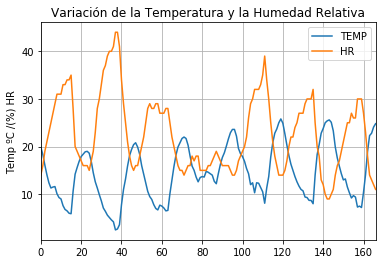

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()
#Aquí se utilizan dos variables en la misma gráfica. Por lo que se declara una variable nueva llamada "df1" que
#contiene a los df de "TEMP" y "HR". En el segundo renglón se usa df1.plot para graficar esa variable compuesta.

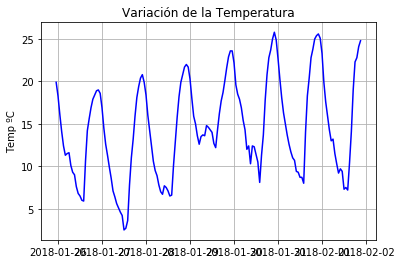

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

In [15]:
df.TEMP.min()

2.5

In [16]:
df.TEMP.max()

25.800000000000001

In [18]:
df.TEMP.max() - df.TEMP.min()

23.300000000000001

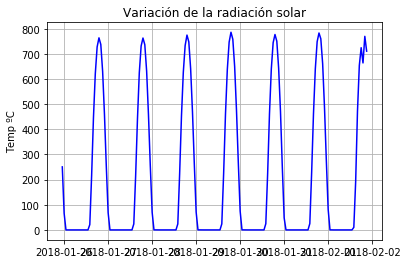

In [19]:
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Variación de la radiación solar")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

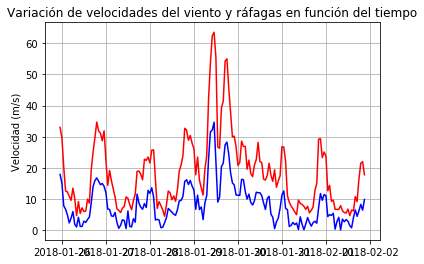

In [20]:
#Las gráficas de dos variables en función de otra se declarabn de manera idependiente cada uno.
#Donde "fmt" es el color de la función y "b-" es blue, "r-" es red, y así.
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="r-")
plt.title("Variación de velocidades del viento y ráfagas en función del tiempo")
plt.ylabel("Velocidad (m/s)")
plt.grid(True)
plt.show()

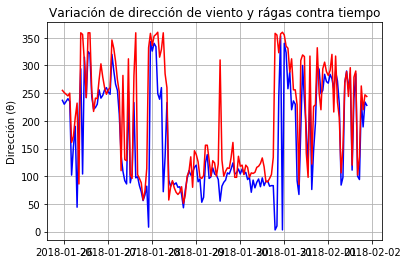

In [22]:
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.DIRR, fmt="r-")
plt.title("Variación de dirección de viento y rágas contra tiempo")
plt.ylabel("Dirección (θ)")
plt.grid(True)
plt.show()

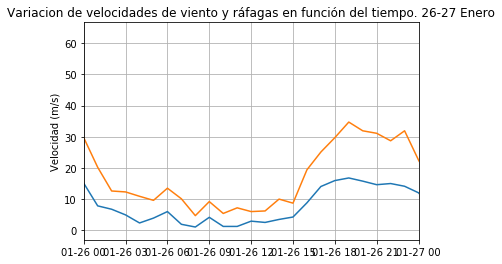

In [24]:
#Gráfica de velocidad de vientos y ráfagas en un solo día.
y=df[['VELS','VELR']]
x=df['FECHA']
plt.plot(x,y)
plt.xlim(['2018-01-26','2018-01-27']) #Esto acota a los límites de una variable.
plt.title("Variacion de velocidades de viento y ráfagas en función del tiempo. 26-27 Enero")
plt.ylabel("Velocidad (m/s)")
plt.grid(True)
plt.show()